In [ ]:
library(data.table)
library(dplyr)
library(tidyr)
library(ggplot2)
library(cowplot)
library(ggsci)

In [83]:
d = fread("../data/benchmark/2comb/res2-2.txt")
d <- d %>% mutate(
    sigtype = as.factor(sigtype),
    sig1 = as.factor(sig1),
    sig2 = as.factor(sig2),
    ratio = as.factor(ratio),
    noise = as.factor(noise),
    nmut = as.factor(nmut)
)
head(d)

sigtype,sig1,sig2,ratio,noise,nmut,replica,method,value
10,10,1,5,10,500,0,original,0.5000
10,10,1,5,10,500,0,mle,0.4257
10,10,1,5,10,500,0,mlez,0.4248
10,10,1,5,10,500,0,ds,0.4299
10,10,1,5,10,500,1,original,0.5000
10,10,1,5,10,500,1,mle,0.4603


In [35]:
# MSE for signatures:
# value - orig for tested signatures

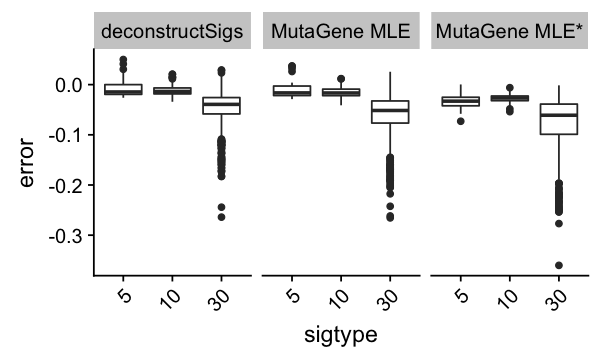

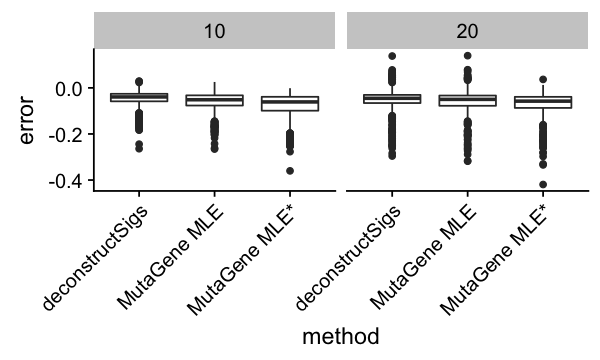

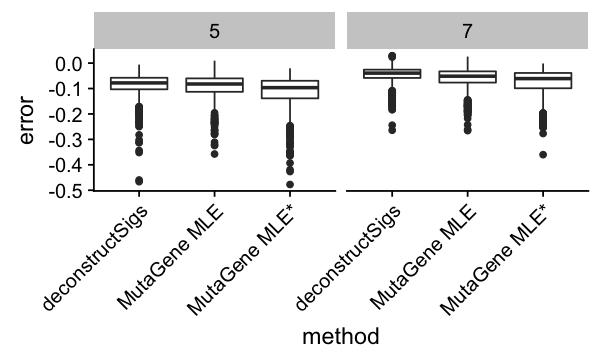

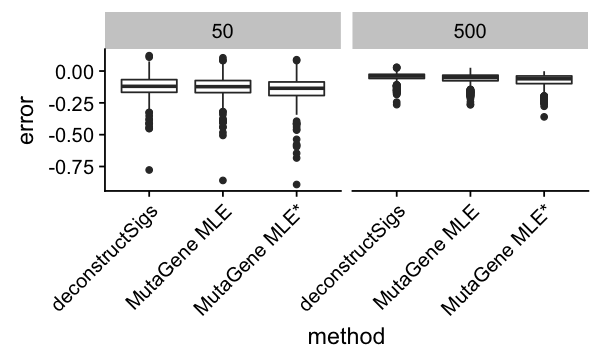

In [106]:
d_mse <- d %>%
    spread(method, value) %>%
    gather(key = method, value = value, mle, mlez, ds) %>%
    mutate(e = (value - original)) %>%
    group_by(sigtype, sig1, sig2, ratio, noise, nmut, method)    %>%
    summarise(
        n = n(),
        error = mean(e)
    ) %>%
    mutate(method = recode(method,
        ds='deconstructSigs',
        mle='MutaGene MLE',
        mlez='MutaGene MLE*'
    ))

# head(d_mse)
options(repr.plot.width=5, repr.plot.height=3)
ggplot(d_mse %>% filter(nmut==500 & ratio==7 & noise==10)) +
    geom_boxplot(aes(x=sigtype, y=error)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~method)

ggplot(d_mse %>% filter(sigtype==30 & nmut==500 & ratio==7)) +
    geom_boxplot(aes(x=method, y=error)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~noise)

ggplot(d_mse %>% filter(sigtype==30 & nmut==500 & noise==10)) +
    geom_boxplot(aes(x=method, y=error)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~ratio)

ggplot(d_mse %>% filter(sigtype==30 & ratio==7 & noise==10)) +
    geom_boxplot(aes(x=method, y=error)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~nmut)

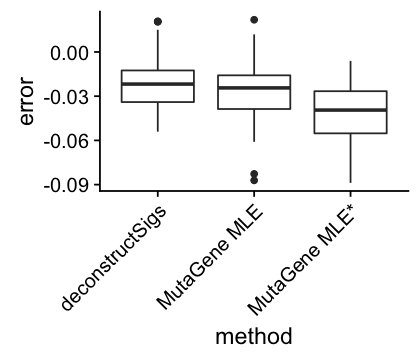

In [123]:
d_mse <- d %>% filter(sigtype == 10 & noise == 10 & nmut == 500) %>%
    spread(method, value) %>%
    gather(key = method, value = value, mle, mlez, ds) %>%
    mutate(e = (value - original)) %>%
    group_by(sigtype, sig1, sig2, ratio, noise, nmut, method)    %>%
    summarise(
        n = n(),
        error = mean(e)
    ) %>%
    mutate(method = recode(method,
        ds='deconstructSigs',
        mle='MutaGene MLE',
        mlez='MutaGene MLE*'
    ))

# head(d_mse)
options(repr.plot.width=3.5, repr.plot.height=3)
error_vs_method <- ggplot(d_mse) + geom_boxplot(aes(x=method, y=error)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
error_vs_method

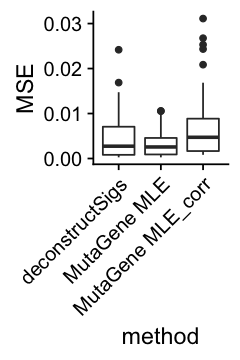

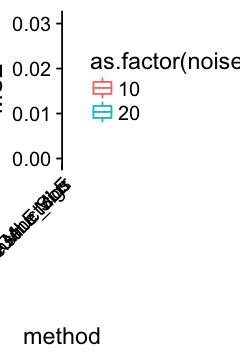

In [108]:
d_mse <- d %>% filter(sigtype == 5 & ratio == 7) %>%
    spread(method, value) %>%
    gather(key = method, value = value, mle, mlez, ds) %>%
    mutate(
        SE = (value - original)**2
    ) %>%
    group_by(sig1, sig2, ratio, noise, nmut, method)    %>%
    summarise(
        n = n(),
        MSE = mean(SE)
    ) %>%
    mutate(method = recode(method,
        ds='deconstructSigs',
        mle='MutaGene MLE',
        mlez='MutaGene MLE_corr'
    ))

# head(d_mse)
mse_vs_method <- ggplot(d_mse) + geom_boxplot(aes(x=method, y=MSE)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

options(repr.plot.width=2, repr.plot.height=3)
mse_vs_method

ggplot(d_mse) + geom_boxplot(aes(x=method, color=as.factor(noise), y=MSE)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))



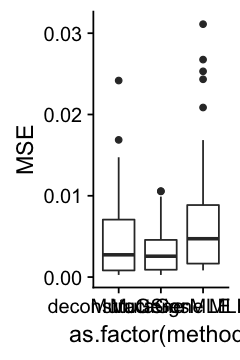

In [109]:
ggplot(d_mse) + geom_boxplot(aes(x=as.factor(method), y=MSE))

In [ ]:
plot_grid(

, labels=c('A'))

In [ ]:
options(repr.plot.width=8, repr.plot.height=2*30)
d2 = d %>% filter(sigtype == 30 & ratio==5 & noise==10 & nmut==500)
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, fill=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=30)

In [ ]:
options(repr.plot.width=8, repr.plot.height=2)
d2 = d %>% filter(sigtype == 5 & ratio==7 & noise==20 & nmut==50)
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=1)

In [ ]:
d %>% filter(sigtype == 5) %>%
    group_by(sig1, sig2, nmut, noise, method)    %>%
    summarise(
        n = n(),
        mvalue = mean(value, na.rm = TRUE)
    )

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==5 & noise==10 & nmut==500)
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) + 
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==5 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) + 
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & noise==10 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(nmut)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
s0 = d %>% filter(sigtype == 10 & ratio == 7) %>%
    group_by(sig1, sig2, nmut, noise, method)    %>%
    summarise(
        n = n(),
        mvalue = mean(value, na.rm = TRUE)
    )
s1 = s0 %>%
    spread(method, mvalue)

s2 = s0 %>%
    spread(nmut, mvalue)

s3 = s0 %>%
    spread(noise, mvalue)

In [ ]:
s2 = s1 %>% mutate(ds = original - ds, mle=original-mle) %>%
    select(-original)

options(repr.plot.width=4, repr.plot.height=2)
plot_grid(ggplot(s2) + geom_histogram(aes(mle)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          ggplot(s2) + geom_histogram(aes(ds)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          labels = c("A", "B"), align = "h")

In [ ]:
options(repr.plot.width=2, repr.plot.height=2)
ggplot(s0 %>% filter(method != "original")) + geom_boxplot(aes(y=mvalue, x=method, fill=method), show.legend=F)

In [ ]:
options(repr.plot.width=4, repr.plot.height=1.8)
plot_grid(ggplot(s2) + geom_point(aes(ds, mle)),
          ggplot(s) + geom_point(aes(ds, mle)),
          labels = c("A", "B"), align = "h")